In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
import sklearn

import warnings
warnings.filterwarnings("ignore")

- CUSTID: Identification of Credit Card holder (Categorical)
- BALANCE: Balance amount left in their account to make purchases
- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES: Amount of purchase done in installment
- CASHADVANCE: Cash in advance given by the user
- PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX: Numbe of purchase transactions made
- CREDITLIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user
- PRCFULLPAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

In [2]:
df = pd.read_csv('../data/creditcard.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Data preprocessing

First step is data preprocessing. Firstly we'll handle categorical column CUSTID. It is not relevant for our clustering, so we can drop it.

In [3]:
df = df.iloc[:, 1:]
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


We also should check if our dataset contains NaN values.

In [4]:
df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_TRX                         0
PAYMENTS                              0
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can drop one row with no credit limit and replace all NaNs in MINIMUM_PAYMENTS with median value.

In [5]:
df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median())
df = df.dropna()

We should also ensure we have only numeric values in dataframe.

In [6]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Seems OK. Let's procede to exploratory data analysis.

# EDA

Let's see the correlation matrix first.

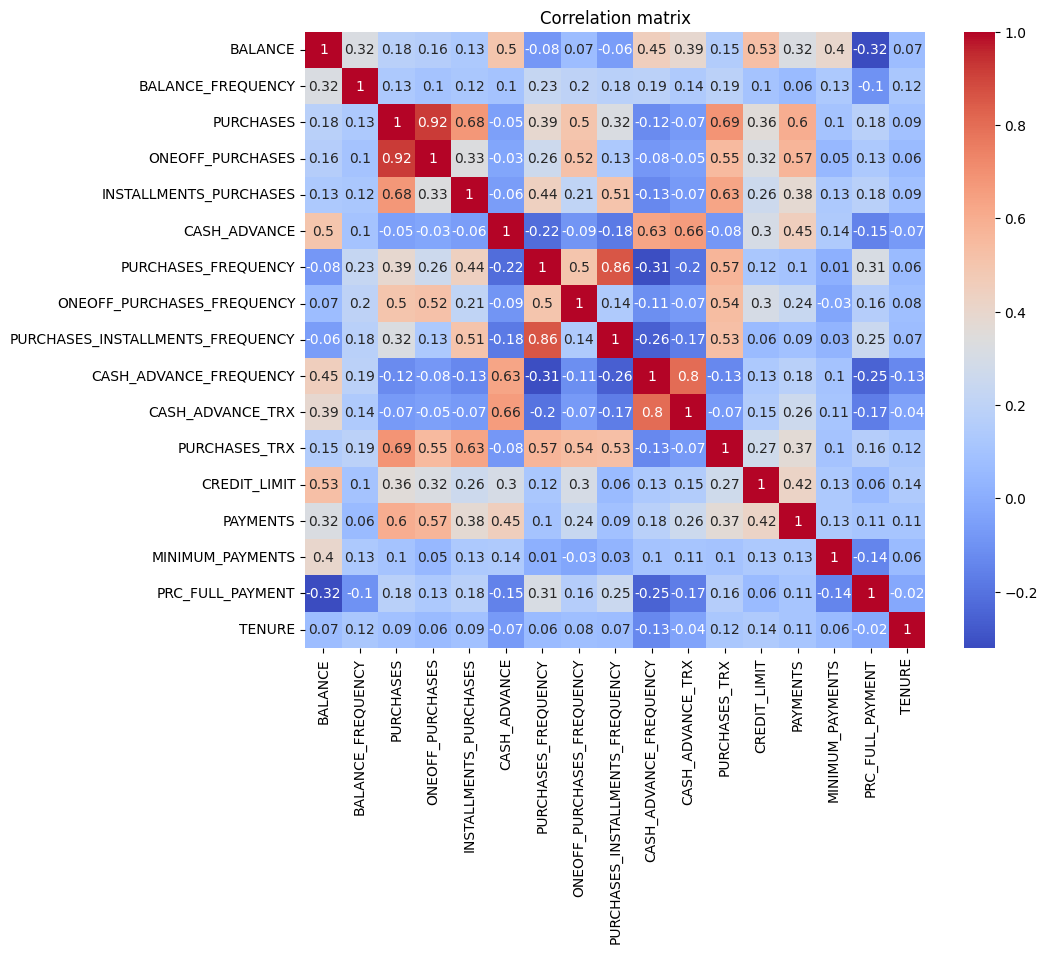

In [7]:
df_corr = df.corr().round(2)
plt.figure(figsize=(10,8))
plt.title('Correlation matrix')
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

There is no seen unexpected correlations between different variables, so we should try to analyze more specific groups.

How many clients are paying below or just about minimal amout of payment?

Risky
False    6312
True     2637
Name: count, dtype: int64


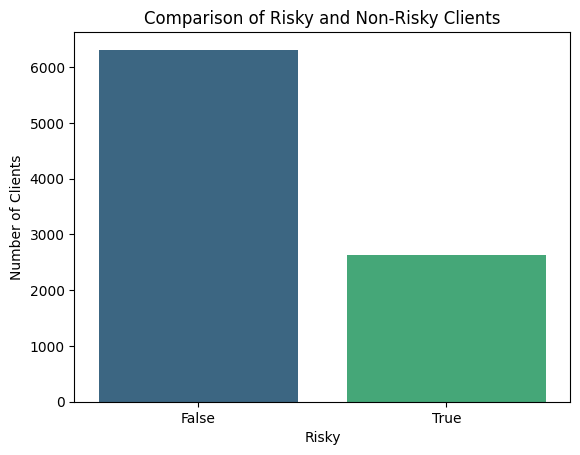

In [8]:
df['Risky'] = df['MINIMUM_PAYMENTS'] >= df['PAYMENTS']
counts = df['Risky'].value_counts()
print(counts)
counts_df = counts.reset_index()
counts_df.columns = ['Risky', 'Count']
sns.barplot(data=counts_df, x='Risky', y='Count', palette='viridis')
plt.title('Comparison of Risky and Non-Risky Clients')
plt.xlabel('Risky')
plt.ylabel('Number of Clients')
plt.show()

As we see, almost 24% of bank clients are at risk. Maybe bank should concentrate on the remaining 76% in their marketing strategy.

It could be interesting to look at the differences in behavior of clients who prefer one-go purchases and installments.

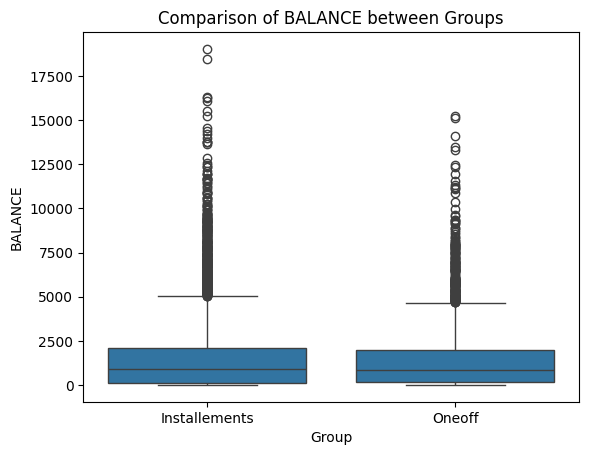

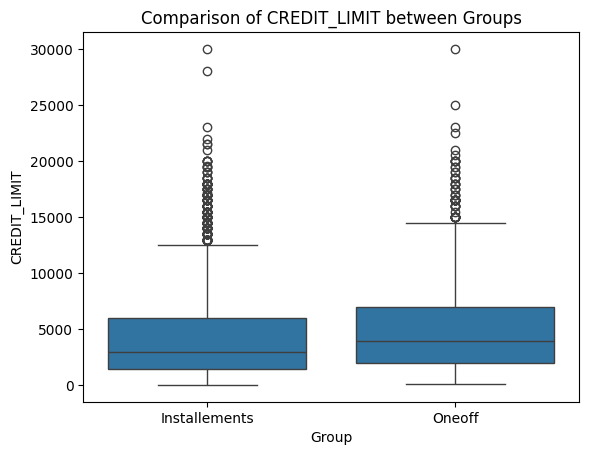

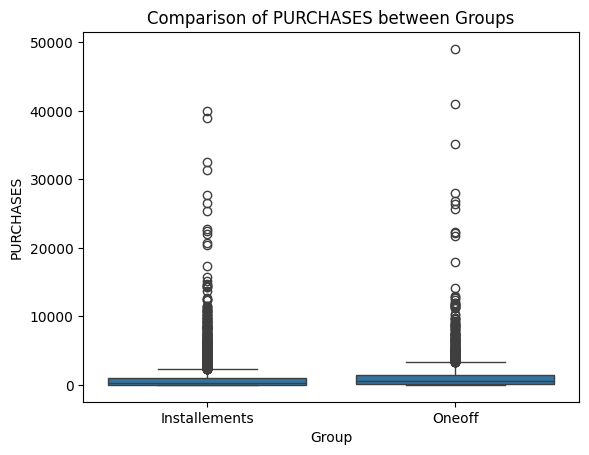

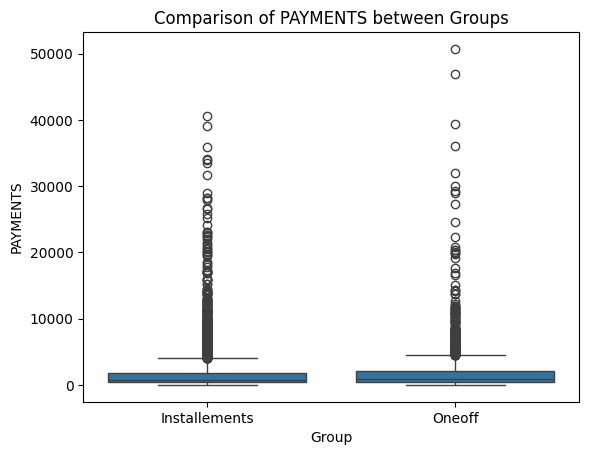

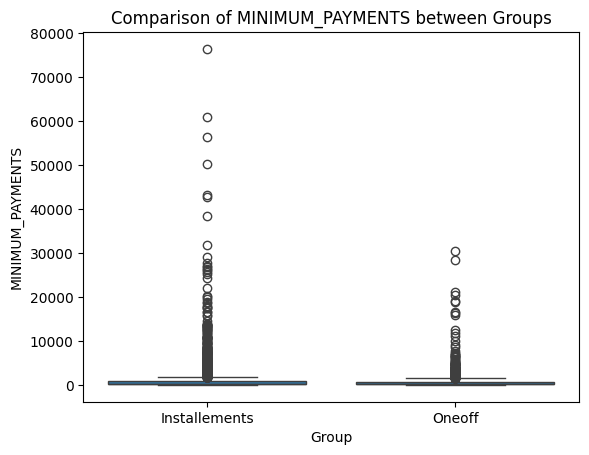

In [9]:
df['Group'] = df['ONEOFF_PURCHASES_FREQUENCY'] > df['PURCHASES_INSTALLMENTS_FREQUENCY'] 
df['Group'] = df['Group'].replace(True, 'Oneoff').replace(False, 'Installements')

features = ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for feature in features:
    sns.boxplot(x='Group', y=feature, data=df)
    plt.title(f'Comparison of {feature} between Groups')
    plt.show()

We can see that people who prefer one-go payments have larger credit limit. Meanwhile there is expectedly much more people with high minimum payment amount among installements group. The first group has more potential in terms of new offers from our side.

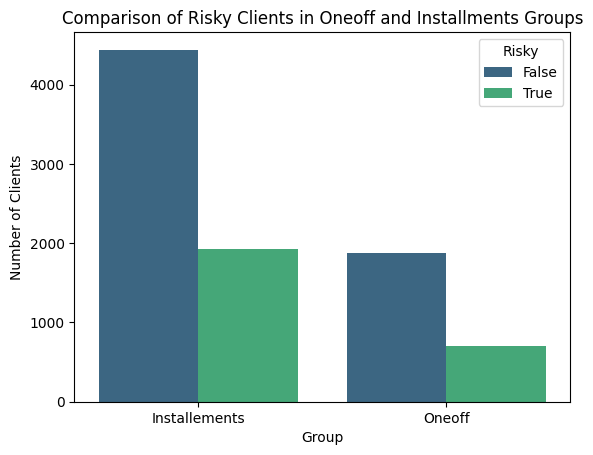

In [10]:
grouped_data = df.groupby(['Group', 'Risky']).size().reset_index(name='Count')
sns.barplot(data=grouped_data, x='Group', y='Count', hue='Risky', palette='viridis')

plt.title('Comparison of Risky Clients in Oneoff and Installments Groups')
plt.xlabel('Group')
plt.ylabel('Number of Clients')
plt.show()

As graphs shows us, the amount of risky clients is equal in both installements and oneoff groups.

Let's drop our custom columns and proceed to clustering.

In [11]:
df = df.drop(columns=['Group', 'Risky'])

# Clustering


Firstly we scale our data to make clustering more precise.

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
X = scaled_data

We will try to analyse the differences in behaviour between people who prefer one-go payments and installments. 

Let's do the K-Means clustering to divide our groups.

In [13]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13, n_init=10).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')
df_clustering_scores

,sse,silhouette
k,,
2,127773.056604,0.210301
3,111962.331575,0.250602
4,99054.054082,0.197669
5,91483.452693,0.193133
6,84819.729725,0.202814
7,79540.080386,0.209016
8,75069.315047,0.213069
9,70873.481671,0.213255
10,66457.146927,0.220518


Plot the SSE and silhouette score

<Axes: xlabel='k', ylabel='sse'>

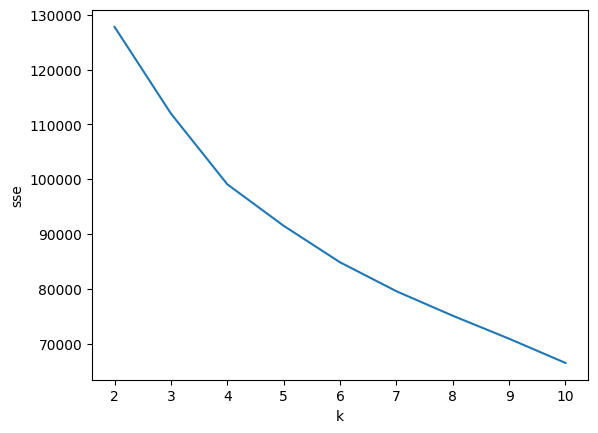

In [14]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

<Axes: xlabel='k', ylabel='silhouette'>

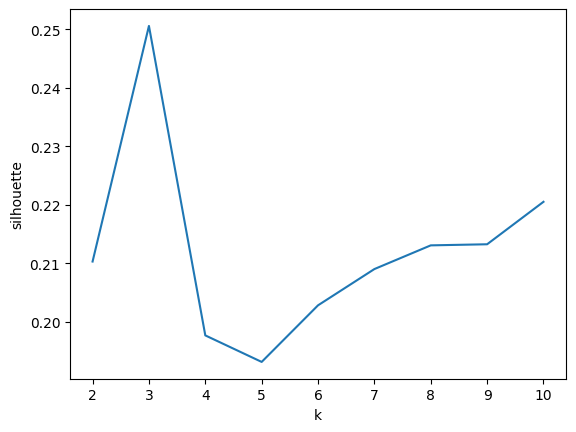

In [15]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

Let's try 4 clusters.

In [16]:
clustering = sklearn.cluster.KMeans(n_clusters=4, random_state=13, n_init=10).fit(X)
pd.Series(clustering.labels_).value_counts()

2    3977
0    3366
3    1197
1     409
Name: count, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

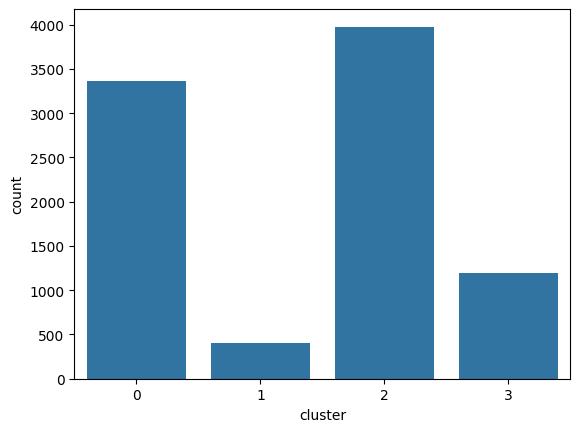

In [17]:
df['cluster'] = clustering.labels_
sns.countplot(data=df, x='cluster')

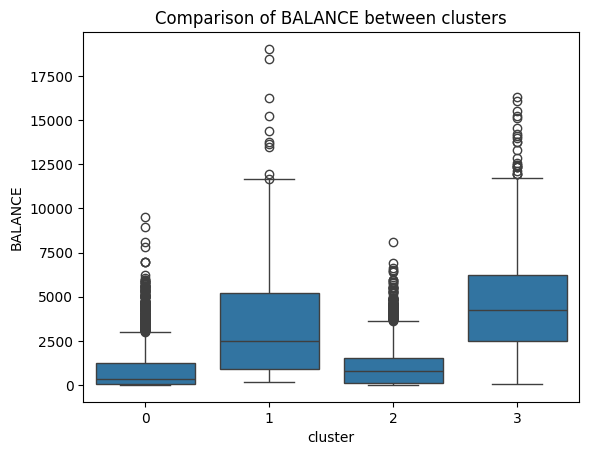

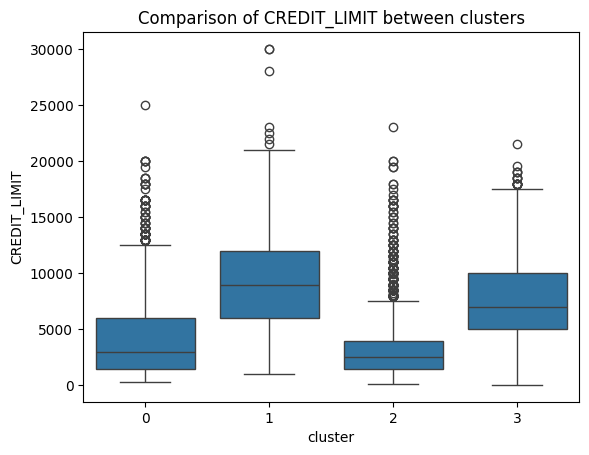

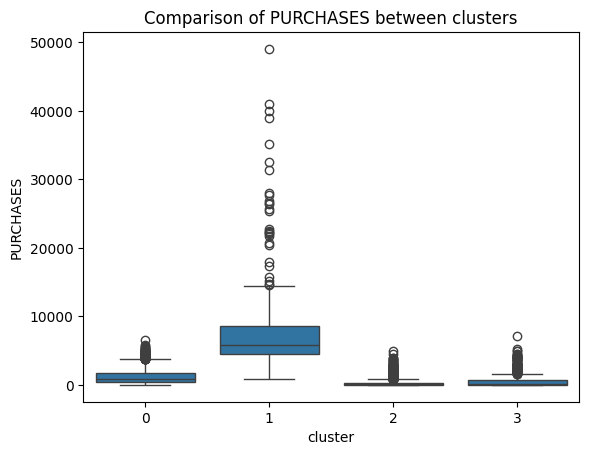

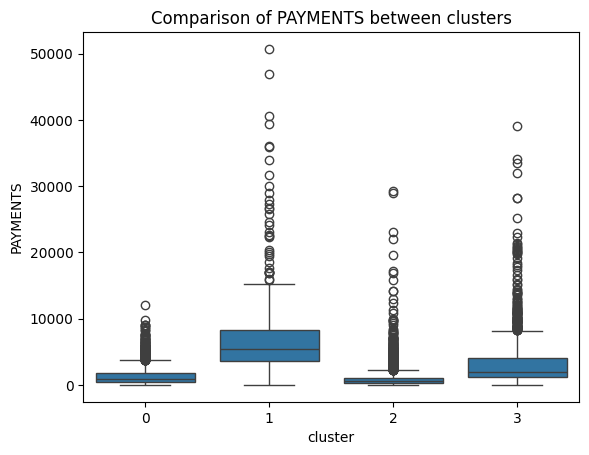

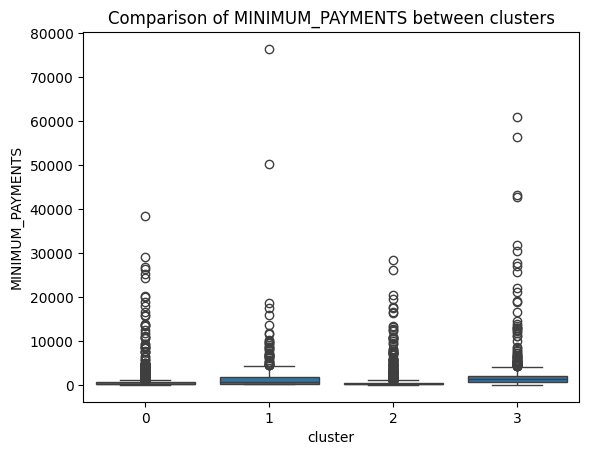

In [18]:
features = ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for feature in features:
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Comparison of {feature} between clusters')
    plt.show()

- People in cluster 2 are the most wealthy and active clients, but also the smallest group (only 88 of them). 
- Cluster 3 is more numerous than cluster 2 and has high credit limit and makes a lot of purchases, but it's low balance limits its potential.
- Cluster 0 is the most valuable for us. They have high balance and make the most payments (only cluster 2 has more), their credit limit also allows additional purchases.
- Cluster 1 is the most numerous (5687 of 9000), has the lowest balance, credit limit and makes less purchases. It is unlikely that those people could allow more expenses. 

KMeans approach divided our client base into 4 parts with pronounced differences which gave us a lot of information about customers. Now let's try another algorithm. Agglomerative clustering is nor really suitable due to the nature of our data, so let's try Spectral clustering.

In [72]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
clustering.fit_predict(X)

df['cluster'] = clustering.labels_

print(df['cluster'].value_counts())

cluster
2    3730
0    3729
1    1490
Name: count, dtype: int64


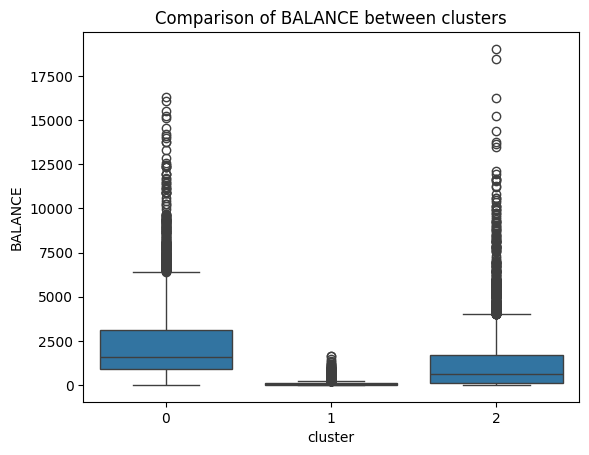

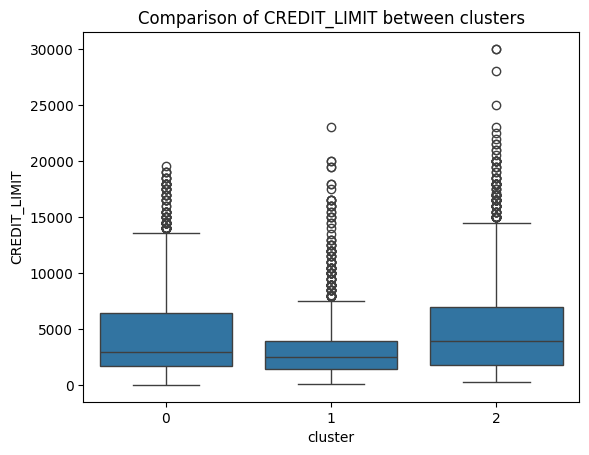

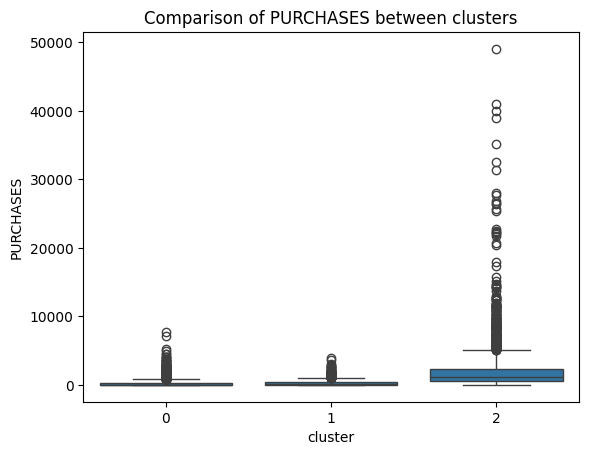

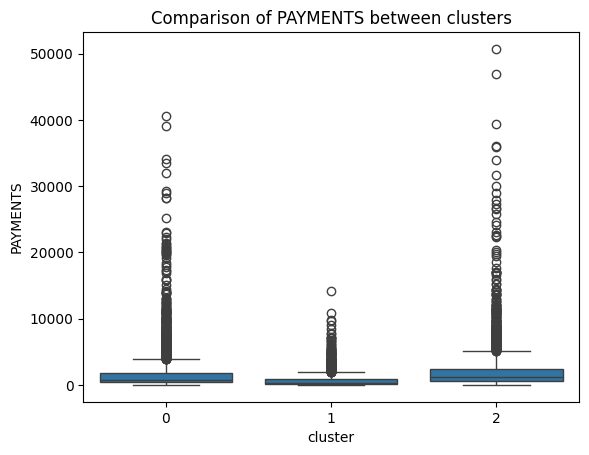

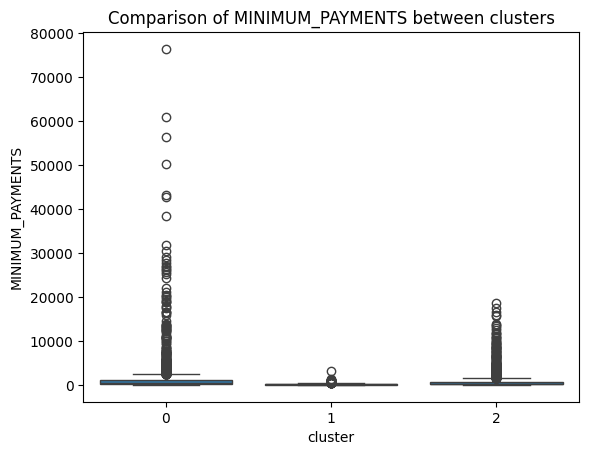

In [73]:
features = ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for feature in features:
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Comparison of {feature} between clusters')
    plt.show()

Here cluster 1 reflects the most passive part of bank clients, with low payments and purchases, meanwhile clusters 2 and 0 are more promising. Theoretically we can drop cluster 1 and work only with remaining data.